In [1]:
%matplotlib inline
import torch
from sklearn.datasets import load_svmlight_file
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from random import random, seed
np.random.seed(1)
shuffle_index = np.arange(768)
np.random.shuffle(shuffle_index)

In [3]:
diabetes_features,diabetes_labels = load_svmlight_file('diabetes_scale.txt')

diabetes_labels[diabetes_labels == -1] = 0 # change -1 to 0, easy for softmax function

# convert data into tensor format
X = torch.from_numpy(diabetes_features.todense()[shuffle_index])
y = torch.from_numpy(diabetes_labels[shuffle_index])

# I don't know why, but if not, will run error
X = X.to(torch.float32)
y = y.to(torch.float32)

# get the first 500 dataset as training and the rest as testing
train_X, test_X = X[:500], X[500:]
train_y, test_y = y[:500], y[500:]


## softmax_perceptron 

In [4]:
# define initialize model parameters
# softmax回归的输入需要是一个向量

def init_params():
    torch.manual_seed(0)
    num_inputs = 8 
    num_outputs = 2
    W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True) 
    b = torch.zeros(num_outputs, requires_grad=True)
    return[W, b]

W, b = init_params()
W, b


(tensor([[-0.0113, -0.0115],
         [-0.0025, -0.0043],
         [ 0.0085,  0.0069],
         [-0.0032, -0.0212],
         [ 0.0032, -0.0126],
         [ 0.0035,  0.0031],
         [ 0.0012,  0.0124],
         [ 0.0112, -0.0025]], requires_grad=True),
 tensor([0., 0.], requires_grad=True))

In [5]:
# def softmax function
# 出来的是对每个类别预测的概率
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True) # 对每一行求和
    return X_exp / partition #这里运用了广播机制

# 实现softmax回归模型
def softmax_net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)


In [6]:
# def cross entropy loss function
# 输出的是预测概率和真实概率之间的损失

def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y.long()])


In [7]:

def softmax_accuracy(y_hat, y):
    """check accuracy"""
    acc_num = 0
    y_hat = y_hat.argmax(axis = 1)
    for i in range(y.shape[0]):
        if y_hat[i] == y[i]:
            acc_num = acc_num + 1

    return acc_num/y.shape[0]


In [8]:
# final 
# training process

def softmax_perceptron(epochs, lr):

    global W,b
    W, b = init_params()

    for i in range(epochs):
        l = cross_entropy(softmax_net(train_X), train_y) 
        loss_list.append(l.sum().detach())

        l.sum().backward()
        
        with torch.no_grad(): # 更新的过程就不算梯度了
            
            W -= lr * W.grad / train_X.shape[0] # / train_X.shape[0]是为了求均值
            W_list.append(W)

            b -= b.grad / train_X.shape[0]
            b_list.append(b)
            
            train_acc_list.append(softmax_accuracy(softmax_net(train_X), train_y))
            test_acc_list.append(softmax_accuracy(softmax_net(test_X), test_y))
            W.grad.zero_() 
            b.grad.zero_()
            
        

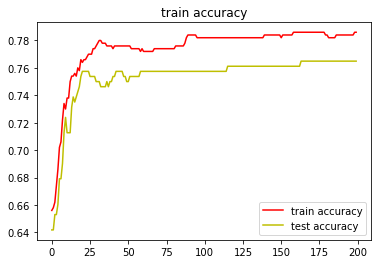

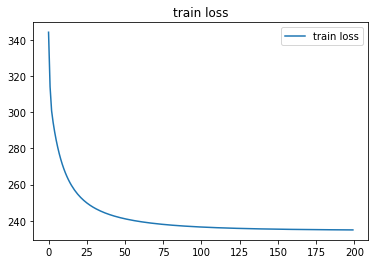

In [9]:
# visualization

W_list = []
b_list = []
loss_list = []
train_acc_list = []
test_acc_list = []

epochs = 200
lr = 1
softmax_perceptron(epochs, lr)

from cProfile import label
from turtle import color

plt.plot(range(epochs), train_acc_list, label = "train accuracy", color = "r")
plt.plot(range(epochs), test_acc_list, label = "test accuracy", color = "y")
plt.legend()
plt.title("train accuracy")
plt.show()

plt.plot(range(epochs), loss_list, label = "train loss")
plt.legend()
plt.title("train loss")
plt.show()

In [10]:
max_train_value = max(train_acc_list)
max_test_value = max(test_acc_list)

max_index = test_acc_list.index(max_test_value)
best_W = W_list[max_index]
best_b = b_list[max_index]

max_train_value, max_test_value, best_W, best_b

(0.786,
 0.7649253731343284,
 tensor([[ 0.4580, -0.4808],
         [ 1.8182, -1.8250],
         [-0.0972,  0.1126],
         [ 0.1709, -0.1952],
         [-0.4840,  0.4745],
         [ 1.1327, -1.1261],
         [ 0.5763, -0.5627],
         [ 0.2175, -0.2088]], requires_grad=True),
 tensor([-0.2764,  0.2764], requires_grad=True))

### try different learning rate on softmax model

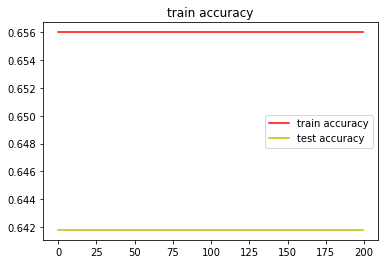

when learning rate is 0.001 the best training accuracy is 0.656 the best test accuracy is 0.642


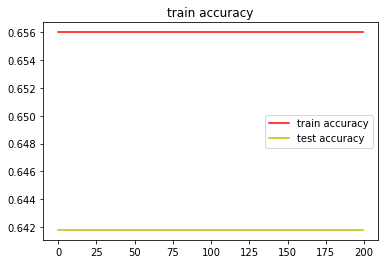

when learning rate is 0.01 the best training accuracy is 0.656 the best test accuracy is 0.642


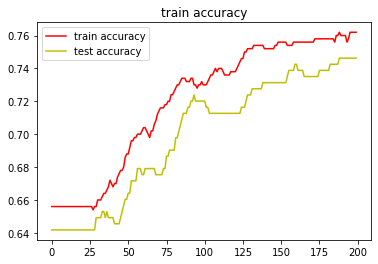

when learning rate is 0.1 the best training accuracy is 0.762 the best test accuracy is 0.746


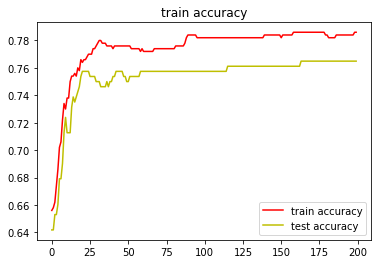

when learning rate is 1 the best training accuracy is 0.786 the best test accuracy is 0.765


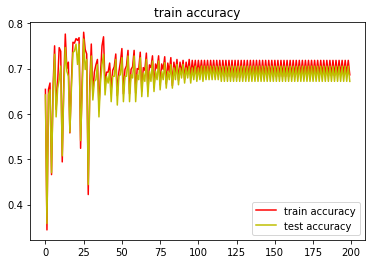

when learning rate is 10 the best training accuracy is 0.78 the best test accuracy is 0.765


In [11]:
# visualization of different learning rate run 200 epochs

lr_list = [0.001, 0.01, 0.1, 1, 10]

for lr in lr_list:
    W_list = []
    b_list = []
    loss_list = []
    train_acc_list = []
    test_acc_list = []
    softmax_perceptron(200, lr)

    plt.plot(range(200), train_acc_list, label = "train accuracy", color = "r")
    plt.plot(range(200), test_acc_list, label = "test accuracy", color = "y")
    plt.legend()
    plt.title("train accuracy")
    plt.show()
    print("when learning rate is", lr, "the best training accuracy is",max(train_acc_list),"the best test accuracy is",round(max(test_acc_list),3))
